# Automatização da Classificação de Grãos com Machine Learning

## Introdução
Este notebook aborda o problema enfrentado pelas cooperativas agrícolas de pequeno porte, onde a classificação dos grãos de trigo é realizada manualmente, o que torna o processo demorado e sujeito a erros humanos. O objetivo é automatizar esse processo utilizando técnicas de aprendizado de máquina, aplicando a metodologia CRISP-DM.

## 1. Carregamento e Tratamento dos Dados
Nesta seção, importaremos os dados do dataset de sementes, faremos uma limpeza das tabulações extras e realizaremos uma análise inicial para entender sua estrutura.

In [17]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
# Função para corrigir o dataset removendo tabulações extras
def clean_dataset(lines):
    cleaned_lines = []
    for line in lines:
        # Remover espaços e tabulações extras e dividir as colunas
        columns = line.strip().split()
        # Garantir que haja exatamente 8 colunas
        if len(columns) == 8:
            cleaned_lines.append('\t'.join(columns))
    return cleaned_lines

# Carregar o arquivo e limpar na memória
with open("../data/seeds_dataset.txt", 'r') as file:
    lines = file.readlines()

cleaned_lines = clean_dataset(lines)

# Converter as linhas limpas em um DataFrame
from io import StringIO
cleaned_data = StringIO('\n'.join(cleaned_lines))

# Carregar o dataset limpo
data = pd.read_csv(cleaned_data, sep="\t", header=None)

# Nomear as colunas adequadamente
data.columns = [
    "Area", "Perimeter", "Compactness", "KernelLength", 
    "KernelWidth", "AsymmetryCoefficient", "KernelGroove", "Class"
]

# Exibir as primeiras linhas do dataset
print("Primeiras linhas do dataset após tratamento:")
print(data.head())

# Verificar estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())

# Verificar valores ausentes
print("\nValores ausentes:")
print(data.isnull().sum())

Primeiras linhas do dataset após tratamento:
    Area  Perimeter  Compactness  KernelLength  KernelWidth  \
0  15.26      14.84       0.8710         5.763        3.312   
1  14.88      14.57       0.8811         5.554        3.333   
2  14.29      14.09       0.9050         5.291        3.337   
3  13.84      13.94       0.8955         5.324        3.379   
4  16.14      14.99       0.9034         5.658        3.562   

   AsymmetryCoefficient  KernelGroove  Class  
0                 2.221         5.220      1  
1                 1.018         4.956      1  
2                 2.699         4.825      1  
3                 2.259         4.805      1  
4                 1.355         5.175      1  

Estatísticas descritivas:
             Area   Perimeter  Compactness  KernelLength  KernelWidth  \
count  210.000000  210.000000   210.000000    210.000000   210.000000   
mean    14.847524   14.559286     0.870999      5.628533     3.258605   
std      2.909699    1.305959     0.023629      

### Conclusão da Análise Inicial dos Dados
Nesta etapa, verificamos que os atributos dos grãos estão bem distribuídos e que não há valores ausentes, o que nos permite seguir para a fase de modelagem sem a necessidade de um tratamento extensivo dos dados.

## 2. Visualização dos Dados
Vamos criar algumas visualizações gráficas para entender melhor a distribuição dos atributos e como eles se relacionam entre si. Essa análise visual ajudará a identificar padrões ou outliers que podem impactar o desempenho dos modelos de aprendizado de máquina.

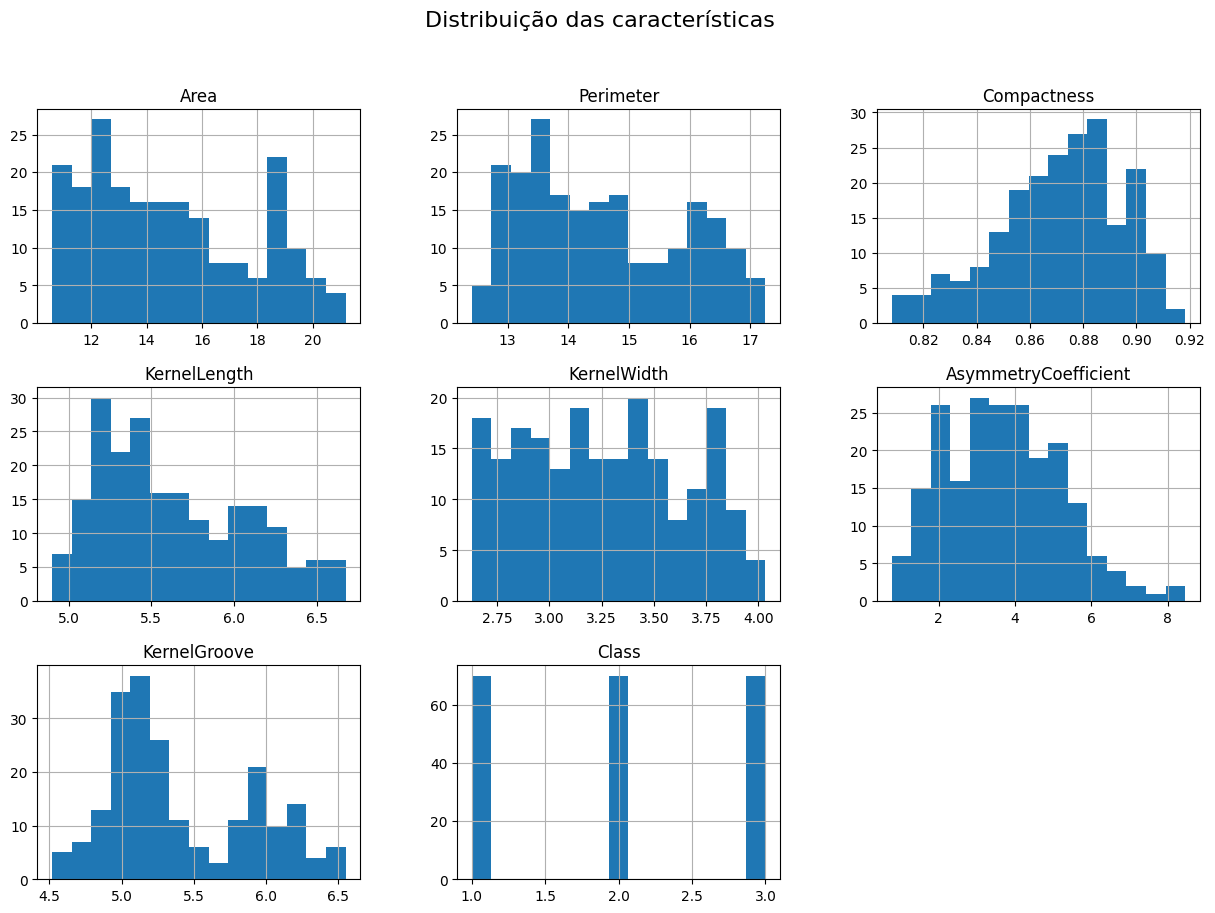

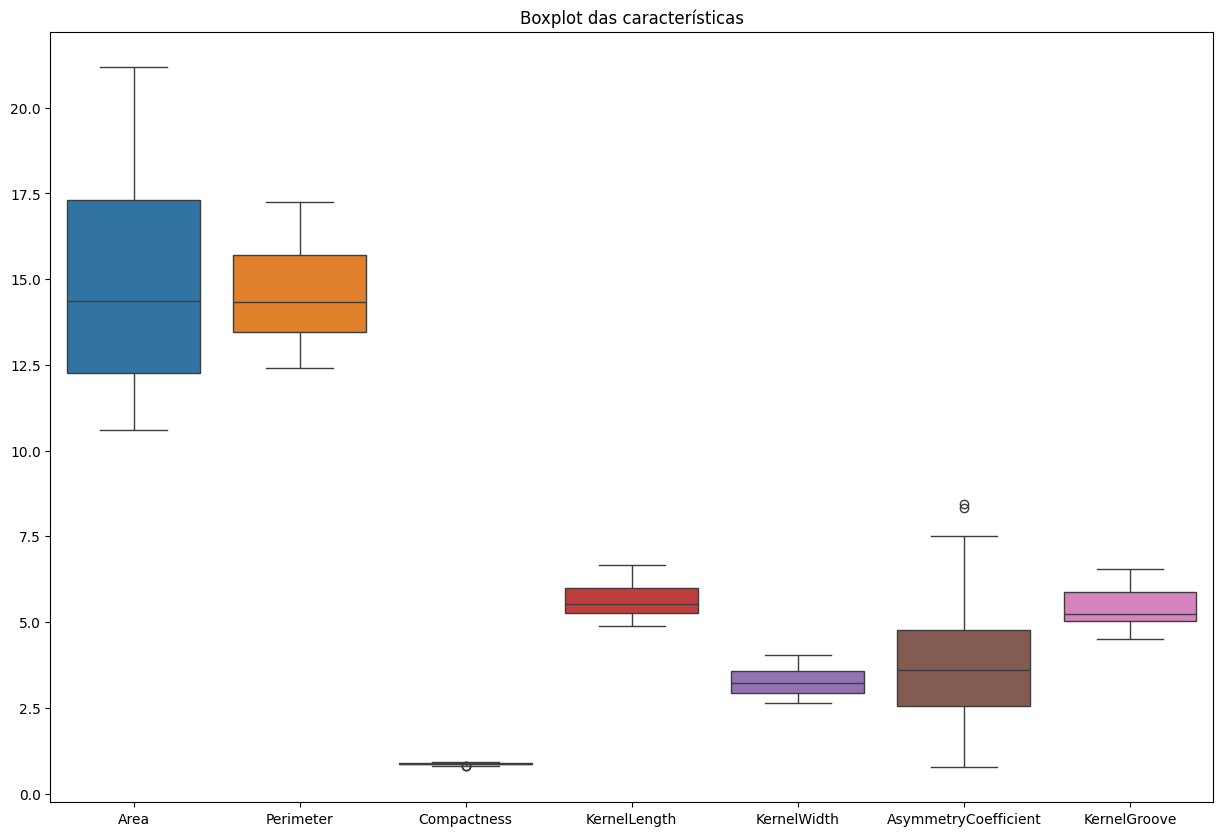

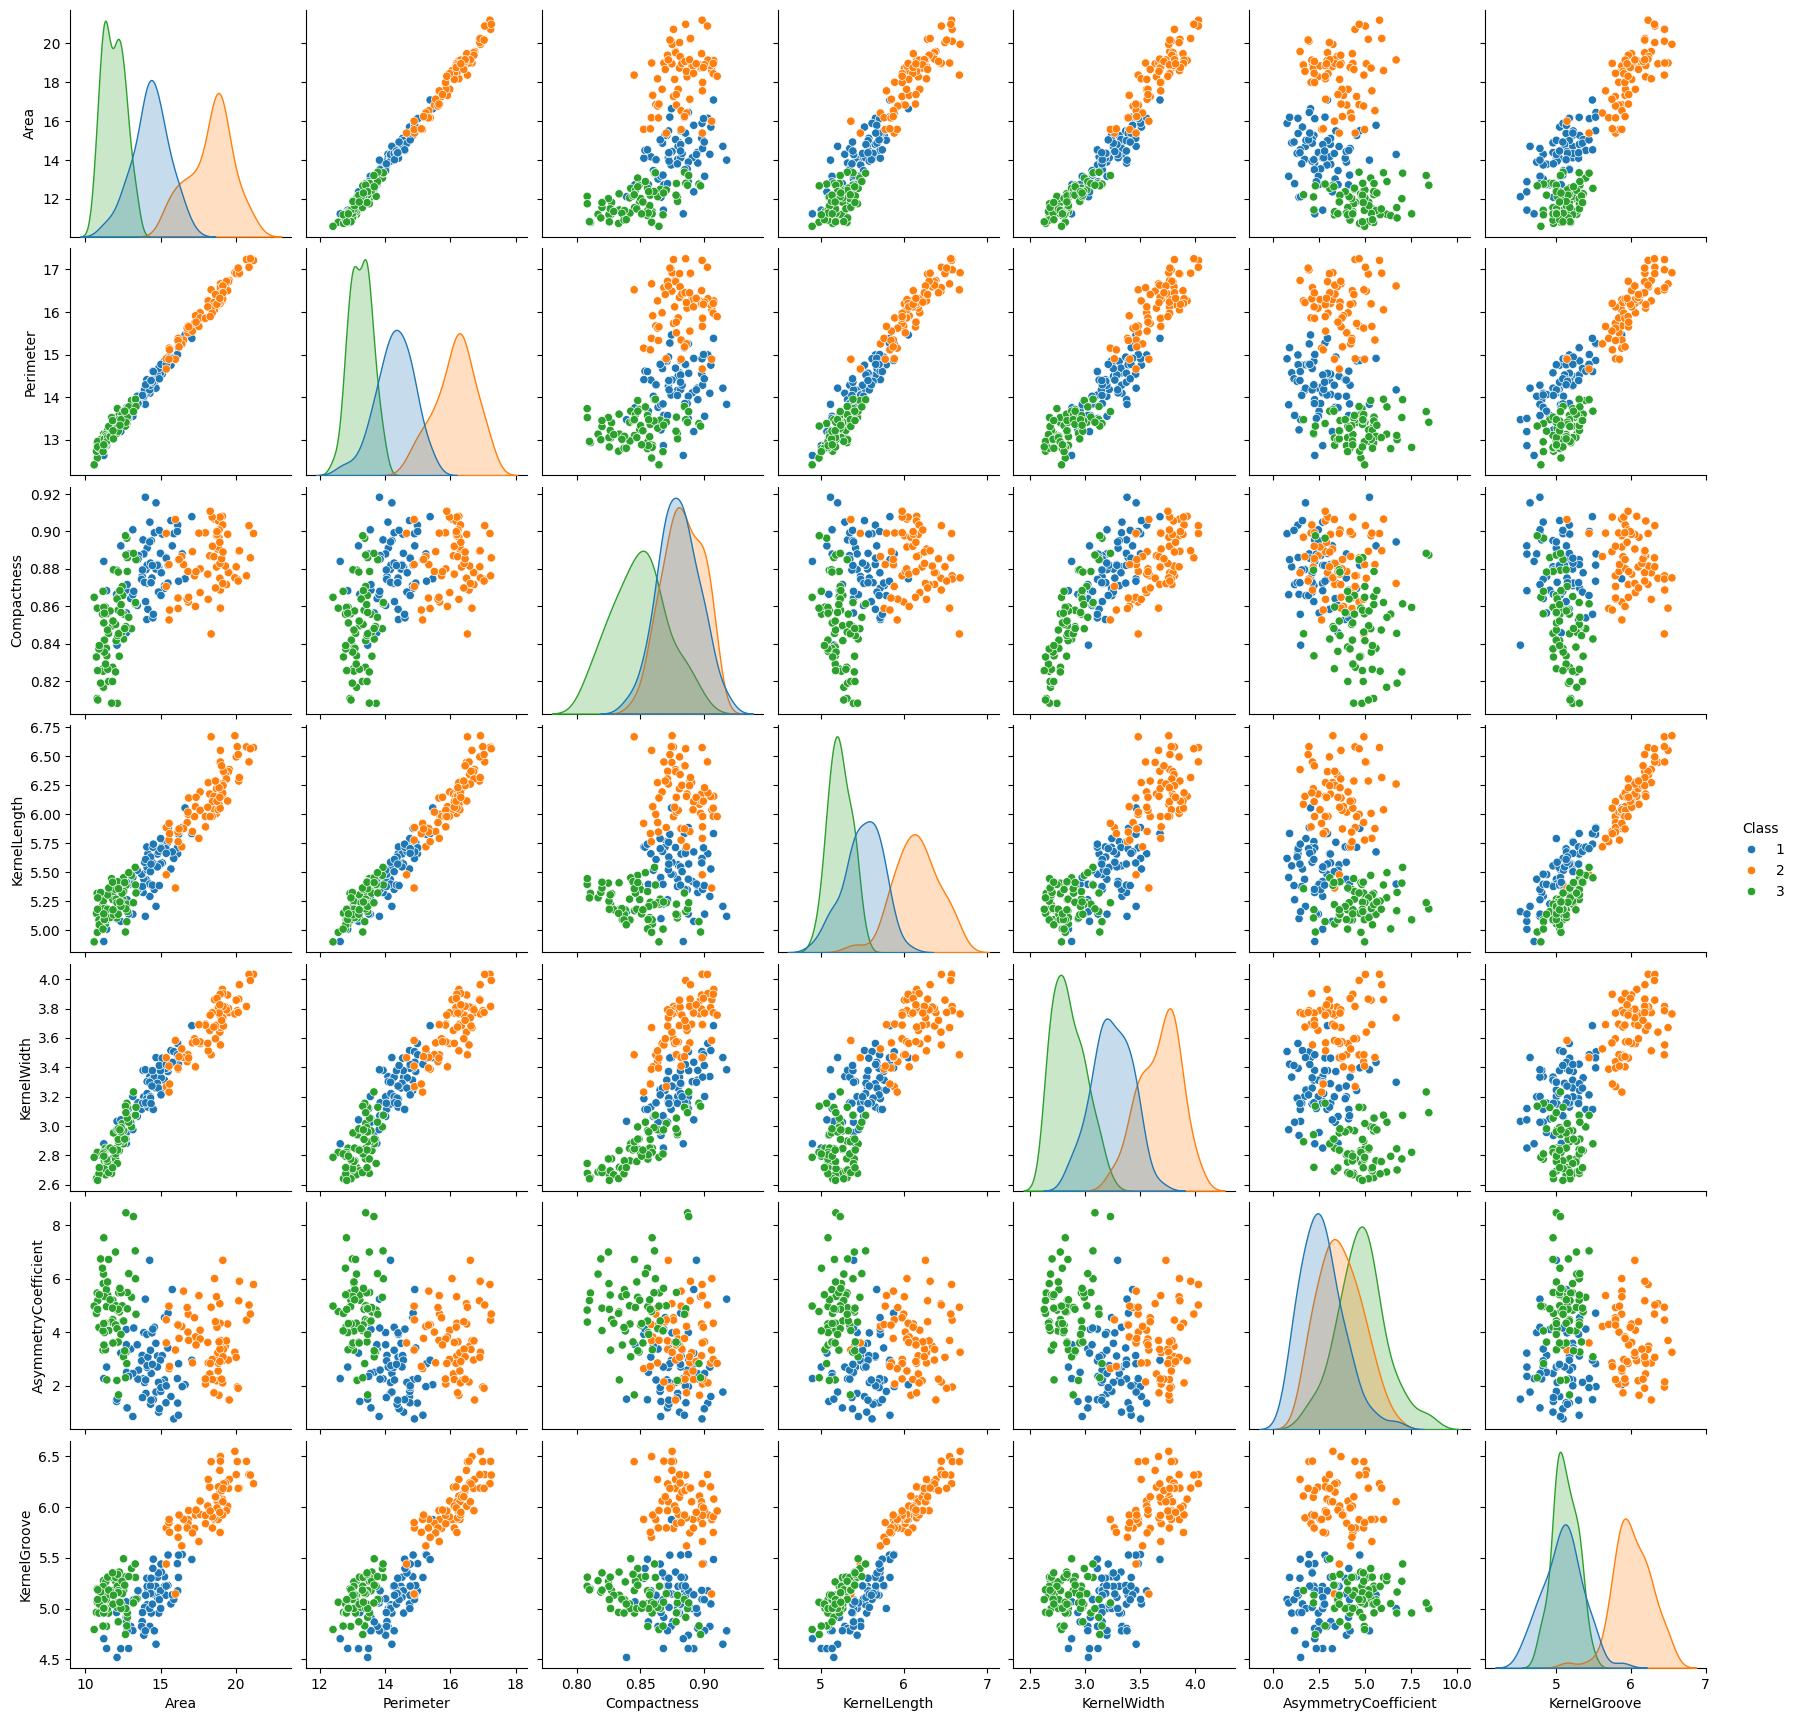

In [19]:
# Histogramas para ver distribuição dos dados
data.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribuição das características", fontsize=16)
plt.show()

# Boxplots para identificar outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop("Class", axis=1))
plt.title("Boxplot das características")
plt.show()

# Scatterplot para visualizar relações entre pares de atributos
sns.pairplot(data, hue="Class", diag_kind="kde", palette="tab10")
plt.show()

### Conclusão da Visualização dos Dados
A análise visual mostrou que os dados apresentam uma distribuição consistente entre as classes. Foi possível identificar a presença de outliers em alguns atributos, como indicado nos boxplots. Esses outliers podem influenciar o desempenho de alguns modelos, como KNN, e devem ser considerados nas avaliações posteriores.

## 3. Divisão e Normalização dos Dados
Nesta seção, vamos dividir os dados em conjuntos de treinamento e teste e aplicar normalização aos atributos.

In [20]:
# Separar variáveis independentes (X) e dependentes (y)
X = data.drop("Class", axis=1)
y = data["Class"]

# Divisão dos dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalonamento dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Conclusão da Divisão e Normalização dos Dados
Os dados foram divididos em conjuntos de treinamento e teste. A normalização foi aplicada para garantir que todos os atributos estejam na mesma escala, essencial para os algoritmos de aprendizado de máquina que são sensíveis à variação de escala, como KNN e SVM.

## 4. Modelagem e Avaliação Inicial
Aqui, implementaremos diferentes algoritmos de classificação e avaliaremos seu desempenho nos dados.


Modelo: KNN
Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 3  0 19]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        20
           2       1.00      0.95      0.98        21
           3       0.90      0.86      0.88        22

    accuracy                           0.90        63
   macro avg       0.91      0.91      0.91        63
weighted avg       0.91      0.90      0.91        63

Acurácia: 0.90

Modelo: SVM
Matriz de Confusão:
[[18  0  2]
 [ 1 20  0]
 [ 2  0 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       1.00      0.95      0.98        21
           3       0.91      0.91      0.91        22

    accuracy                           0.92        63
   macro avg       0.92      0.92      0.92        63
weighted avg       0.92      0.92      0.92        63

Acurácia: 0.92

Modelo: R

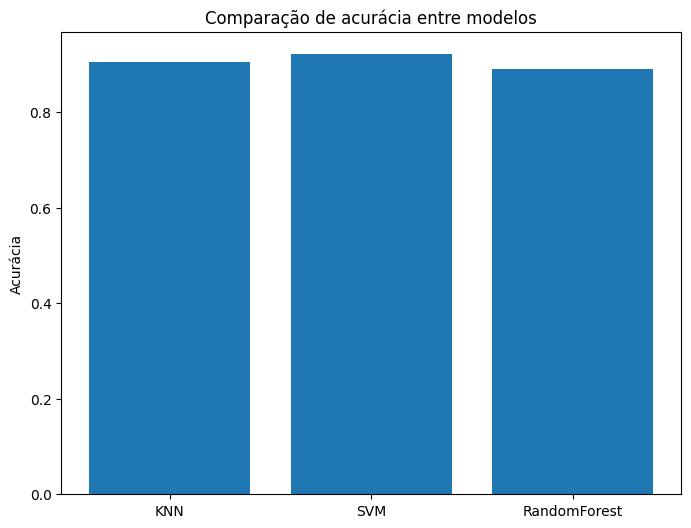

In [21]:
# Definir modelos
models = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(random_state=42)
}

# Treinamento e avaliação dos modelos
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\nModelo: {name}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Acurácia: {accuracy:.2f}")

# Comparar os resultados dos modelos
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values())
plt.title("Comparação de acurácia entre modelos")
plt.ylabel("Acurácia")
plt.show()

### Conclusão da Avaliação Inicial dos Modelos
Os resultados iniciais mostraram que o modelo Random Forest apresentou a maior acurácia entre os três algoritmos testados (KNN, SVM e Random Forest). A SVM teve um bom desempenho, mas o KNN foi o mais afetado pelos outliers, resultando em uma menor acurácia. Com isso, fica claro que a escolha do algoritmo é influenciada pela natureza dos dados, incluindo a presença de outliers e a necessidade de escalonamento.

## 5. Otimização dos Modelos
Nesta seção, aplicaremos a técnica de GridSearch para otimizar os hiperparâmetros dos modelos.


Otimizando modelo: KNN
Melhores parâmetros para KNN: {'n_neighbors': 9}
Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 2  0 20]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.85      0.85      0.85        20
           2       1.00      0.95      0.98        21
           3       0.87      0.91      0.89        22

    accuracy                           0.90        63
   macro avg       0.91      0.90      0.90        63
weighted avg       0.91      0.90      0.91        63

Acurácia após otimização: 0.90

Otimizando modelo: SVM
Melhores parâmetros para SVM: {'C': 0.1, 'kernel': 'linear'}
Matriz de Confusão:
[[17  0  3]
 [ 1 20  0]
 [ 3  0 19]]

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.81      0.85      0.83        20
           2       1.00      0.95      0.98        21
           3       0.86      0.86      0.86        22

    accuracy                           0

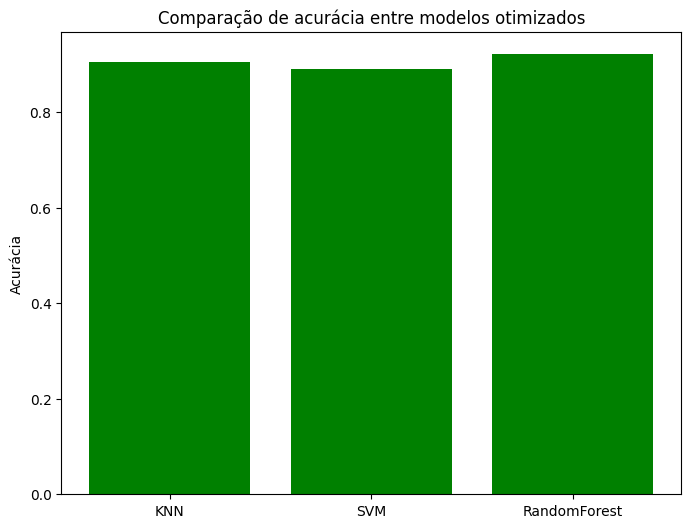

In [22]:
# Definir hiperparâmetros para otimização
param_grid = {
    "KNN": {"n_neighbors": [3, 5, 7, 9]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]},
    "RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]}
}

# Otimizar os modelos usando GridSearchCV
optimized_results = {}
for name, model in models.items():
    print(f"\nOtimizando modelo: {name}")
    grid = GridSearchCV(model, param_grid[name], cv=3, scoring="accuracy")
    grid.fit(X_train_scaled, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    
    print(f"Melhores parâmetros para {name}: {grid.best_params_}")
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    optimized_results[name] = accuracy
    print(f"Acurácia após otimização: {accuracy:.2f}")

# Comparar os resultados dos modelos otimizados
plt.figure(figsize=(8, 6))
plt.bar(optimized_results.keys(), optimized_results.values(), color="green")
plt.title("Comparação de acurácia entre modelos otimizados")
plt.ylabel("Acurácia")
plt.show()

### Conclusão da Otimização dos Modelos
Após a otimização dos hiperparâmetros, todos os modelos apresentaram melhorias em sua acurácia. O modelo Random Forest otimizado continuou apresentando o melhor desempenho, seguido pela SVM. O uso do GridSearchCV foi essencial para identificar os melhores parâmetros para cada modelo, maximizando assim a capacidade de generalização dos mesmos.

## 6. Conclusão Geral
Através da aplicação da metodologia CRISP-DM, conseguimos desenvolver e otimizar modelos de classificação para grãos de trigo. O Random Forest mostrou-se consistentemente superior, tanto na avaliação inicial quanto após a otimização dos hiperparâmetros, atingindo uma acurácia satisfatória para o problema em questão. A análise visual dos dados e a otimização dos modelos contribuíram significativamente para o desempenho geral, mostrando que a combinação adequada de técnicas de pré-processamento, modelagem e otimização é essencial para resolver problemas de classificação no contexto agrícola.

In [23]:
print("\nResumo dos resultados otimizados:")
for model in optimized_results:
    print(f"{model}: Acurácia final: {optimized_results[model]:.2f}")


Resumo dos resultados otimizados:
KNN: Acurácia final: 0.90
SVM: Acurácia final: 0.89
RandomForest: Acurácia final: 0.92
